In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPooling2D
from keras.models import Sequential
import tensorflow as tf

In [ ]:

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 53, 53, 128)      

In [ ]:
from keras.callbacks import ModelCheckpoint,CSVLogger,EarlyStopping

In [ ]:
cp = ModelCheckpoint('/content/drive/My Drive/Covid-19 CT Scans/{epoch:02d}-{val_accuracy:.2f}.h5',monitor='val_accuracy',mode='max',save_best_only=True)

In [ ]:
csv = CSVLogger('performance.csv')

In [ ]:
es = EarlyStopping(monitor='val_loss',patience=3,mode='min')

In [ ]:
callbacks= [csv,es,cp]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True 
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Covid-19 CT Scans/xray_dataset_covid19/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 185 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
   '/content/drive/My Drive/Covid-19 CT Scans/xray_dataset_covid19/test',
   target_size=(224,224),
   batch_size=32,
    class_mode='binary'
)

Found 50 images belonging to 2 classes.


In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=185,callbacks=callbacks,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
185/185 [==============================] - 365s 2s/step - loss: 0.2556 - accuracy: 0.8935 - val_loss: 0.1132 - val_accuracy: 0.9800
Epoch 2/15
185/185 [==============================] - 310s 2s/step - loss: 0.1057 - accuracy: 0.9646 - val_loss: 0.0295 - val_accuracy: 0.9800
Epoch 3/15
185/185 [==============================] - 308s 2s/step - loss: 0.0686 - accuracy: 0.9751 - val_loss: 0.1708 - val_accuracy: 0.9800
Epoch 4/15
185/185 [==============================] - 307s 2s/step - loss: 0.0658 - accuracy: 0.9751 - val_loss: 0.1035 - val_accuracy: 0.9600
Epoch 5/15
185/185 [==============================] - 308s 2s/step - loss: 0.0666 - accuracy: 0.9755 - val_loss: 0.0551 - val_accuracy: 1.0000


In [ ]:
history.history

{'accuracy': [0.8935201, 0.96458006, 0.9751008, 0.9751008, 0.9754515],
 'loss': [0.25573066447505927,
  0.1045667632992781,
  0.06862022685513812,
  0.0661085041235326,
  0.06717499330884469],
 'val_accuracy': [0.9800000190734863,
  0.9800000190734863,
  0.9800000190734863,
  0.9599999785423279,
  1.0],
 'val_loss': [0.11317411810159683,
  0.029534390196204185,
  0.17081865668296814,
  0.10352620482444763,
  0.055149298161268234]}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
xc = range(5)

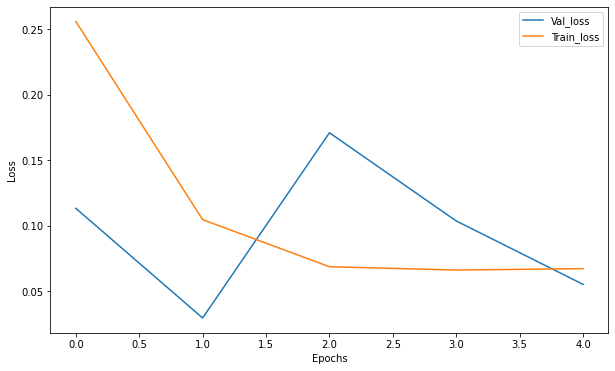

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(xc,history.history['val_loss'])
plt.plot(xc,history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
labels=['Val_loss','Train_loss']
plt.legend(labels,loc='best')

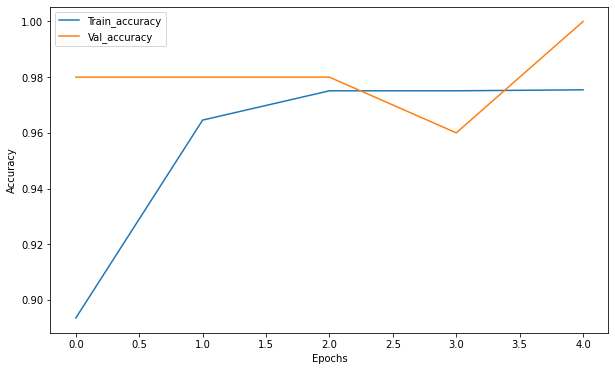

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(xc,history.history['accuracy'])
plt.plot(xc,history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
label=['Train_accuracy','Val_accuracy']
plt.legend(label,loc='best')

In [ ]:
model.save('covid-19_detection.h5')

In [ ]:
model.evaluate_generator(validation_generator)

[0.048178259283304214, 1.0]

In [ ]:
validation_generator.class_indices

{'COVID-19': 0, 'NORMAL': 1}

In [5]:
model1 = keras.models.load_model('/content/drive/My Drive/Covid-19 CT Scans/covid-19_detection.h5')

In [9]:
def predict_image(path):
  image = tf.keras.preprocessing.image.load_img(path,target_size=(224,224))
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.expand_dims(input_arr,axis=0)  # Convert single image to a batch.
  preds = model1.predict(input_arr,verbose=0)
  if preds[0][0] == 0: outcome='Covid-19'
  else : outcome = 'Normal'
  print(outcome)

In [10]:
predict_image('/content/drive/My Drive/Covid-19 CT Scans/5.jpg')

Covid-19
